# TP 4
# Les forêts aléatoires

 **EBNOU Mohamed Nedhir - ELHIANI Youssef**

# Introduction

Méthodes d’agrégation
Les méthodes ensemblistes (ou d’agrégation) pour les algorithmes d’apprentissage statistique (en anglais : ensemble learning) sont basées sur l’idée de combiner les prédictions de plusieurs prédicteurs (ou classifieurs) pour une meilleure généralisation et pour compenser les défauts éventuels de prédicteurs individuels.

En général, on distingue deux familles de méthodes de ce type :
1. Méthodes par moyennage (bagging, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions en espérant un meilleur résultat suite à la réduction de variance de l’éstimateur moyenne.
2. Méthodes adaptatives (boosting) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.
Dans la suite nous explorerons chacune de ces classes d’algorithme en Scikit-learn et présenterons quelques comparaisons.

# Bagging

Commencons par le cas de Les méthodes de type bagging : elles construisent plusieurs instances d’un estimateur, calculées sur des échantillons aléatoires tirés de la base d’apprentissage (et éventuellement une partie des attributs, également sélectionnés de façon aléatoire), et ensuite combine les prédictions individuelles en réalisant leur moyenne pour réduire la variance de l’estimateur. Leur avantage principal réside dans le fait qu’ils construisent une version améliorée de l’algorithme de base, sans demander de modification de cet algorithme. Le prix à payer est un coût de calcul plus élevé. Comme elles réduisent le sur-apprentissage, les méthodes bagging fonctionnent très bien avec des prédicteurs « forts ». Par contraste, les méthodes boosting sont mieux adaptées à des prédicteurs faibles (weak learners).

La base de données des chiffres, contient 10 classes (images des chiffres de l'écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).

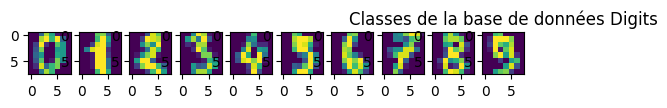

In [100]:
from sklearn.datasets import load_digits 
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.title("Classes de la base de données Digits")
plt.show()

Nous allons utiliser comme classifieur de base un arbre de décision DecisionTreeClassifier. Ce classifieur nous permet d’établir des performances de référence (c’est un ensemble à 1 modèle).

In [47]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


Sur la base d’apprentissage accuracy = 1 . Pour plus de réalisme, découpons la base de données en un jeu d’apprentissage et un je de test afin de voir le comportement de généralisation de l’arbre sur des données différentes des celles d’apprentissage :

In [48]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier() 
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test) 
print(accuracy)

0.7021013597033374


In [49]:
# le calcul de l'accuracy
sum(Z == y_test)/len(Z)

0.7021013597033374

## Question :
Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?


**Réponse :**

In [43]:
accuracy_values = []

for i in range(100):
    # 90% des données pour le test, 10% pour l'apprentissage
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier() 
    clf.fit(X_train, y_train)
    # The predictions 
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracy_values.append(accuracy)


In [44]:
print(f"la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test est : {np.std(accuracy_values)**2}")

la variance de la valeur sur 100 tirages pour la séparation apprentissage/test est : 0.0007164034937607049


In [55]:
print(f"l'écart type de la valeur sur 100 tirages pour la séparation apprentissage/test est : {np.std(accuracy_values)}")

l'écart type de la valeur sur 100 tirages pour la séparation apprentissage/test est : 0.026765714893510782


In [56]:
print(f"La moyenne des valeurs de l'accuracy sur 100 tirages pour la séparation apprentissage/test est : {np.mean(accuracy_values)}")

La moyenne des valeurs de l'accuracy sur 100 tirages pour la séparation apprentissage/test est : 0.695


In [58]:
0.695 + 3*0.026765714893510782

0.7752971446805323

**Conclusion**   

En partant de l'hypothèse que la distribution $X$ des valeurs de l'accuracy est normale de moyenne $\mu = 0.695$ et d'écart type $\sigma = 0.027$, alors  :

$P(X \in [\mu-3\sigma, \mu+3\sigma]) = 0.997$  --> Avec une probabilité de 0.997 les valeurs de l'accuracy se trouveront dans l'intervalle $[0.614, 0.775]$ 

Donc selon le tirage, la valeur de l'accuracy peut correspondre à n'importe quelle valeur de l'intervalle ci-dessus. Pas de stabilité du modèle.



Pour comparer, construisons mainntenant un classifieur bagging sur nos données, toujours basé sur les   :

In [29]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

L’apprentissage et l’évaluation de cet ensemble se font de la façon habituelle :

In [32]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.9079110012360939


## Question :
Calculer la variance de la valeur accuracy  sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

**Réponse :**

In [40]:
accuracy_values = []

for i in range(100):
    # 90% des données pour le test, 10% pour l'apprentissage
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)   
    clf.fit(X_train, y_train)
    # The predictions 
    Z = clf.predict(X_test)
    accuracy=clf.score(X_test,y_test)
    accuracy_values.append(accuracy)

In [41]:
print(f"la variance de la valeur sur 100 tirages pour la séparation apprentissage/test est : {np.std(accuracy_values)**2}")

la variance de la valeur sur 100 tirages pour la séparation apprentissage/test est : 0.0002946825041521451


In [42]:
print(np.mean(accuracy_values))


0.895512978986403


**Conclusion**   

En suivant un raisonnement similaire que précédemment, avec une probabilité de très élevée, les valeurs se trouveront dans l'intervalle : $[xxx, xxx]$ 



On obtient un meilleur classifieur (``accuracy`` ~ 90%), qui en plus est beaucoup plus stable : ``stdev`` autour de 0.00029.

## Question :
Construire le graphique
accuracy vs n_estimators. Que constatez-vous ?

**Réponse :**

In [60]:
len([n_estimators for n_estimators in (10, 300, 10)])

3

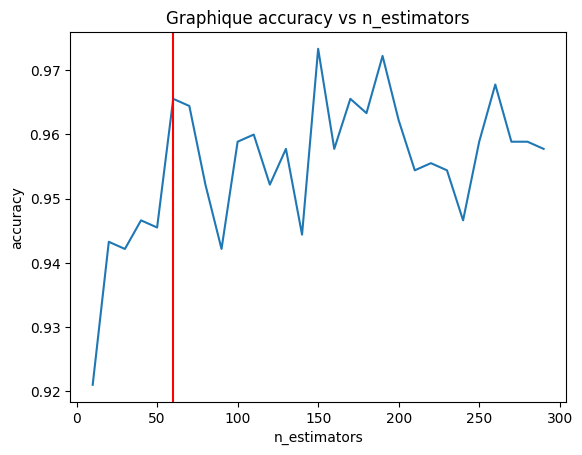

In [64]:
accuracy_values = []

for n_estimators in range(10, 300, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy_values.append(clf.score(X_test,y_test))

plt.plot([n_estimators for n_estimators in range(10, 300, 10)], accuracy_values)
plt.title("Graphique accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.axvline(x=60, color="red", linestyle="-")
plt.show()

**Conclusion** : 

A partir de ``n_estimators = 60`` le resultat commence à osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

## Question :
Faites varier les parametres max_samples et max_features. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser   pour réaliser une recherche systématique.

**Réponse :**
Pour chercher des bonnes valeurs pour les parametres on utilise la validation croisée avec ``GridSearchCV``, comme  dans le TP ses arbres de décision

In [65]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [68]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

grid_params = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=grid_params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Meilleur score trouvé via Gridsearch : {grid_search.best_estimator_.score(X_test, y_test)}")
print(f"Le paramètre max_samples correspondant au meilleur score : {grid_search.best_estimator_.max_samples}")
print(f"Le paramètre max_features correspondant au meilleur score : {grid_search.best_estimator_.max_features}")


Meilleur score trouvé via Gridsearch : 0.917686318131257
Le paramètre max_samples correspondant au meilleur score : 0.6
Le paramètre max_features correspondant au meilleur score : 0.8


# Forêts aléatoires

L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le bagging, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu.

Par la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur RandomForestClassifier. Comme d’habitude, on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test.

In [92]:
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

On peut désormais créer et entraîner notre modèle :

In [93]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=200) 
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Puis réaliser les prédictions et calculer le score de test :

In [94]:
y_pred = clf.predict(X_test) 
accuracy = clf.score(X_test,y_test) 
print(accuracy)

0.9177997527812114


## Question :
  Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?

**Réponse :**

In [96]:

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(f"Arbre de décision : {clf.score(X_test,y_test)}")

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(f"Bagging (200 arbres) : {clf.score(X_test,y_test)}")

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(f"Forèts aléatoires (200 arbres) : {clf.score(X_test,y_test)}")

Arbre de décision : 0.6687268232385661
Bagging (200 arbres) : 0.907292954264524
Forèts aléatoires (200 arbres) : 0.9215080346106304


**Conclusion** : 

Les forèts aléatoires produisent un classifieur un peu meilleur sur cette base de donnees.

## Question :
Construire la variance de la valeur accuracy  sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (bagging) ?

**Réponse :**

In [97]:
bagging_accuracies = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9325806451612902 0.011727635920098395
0.9593103448275861 0.006711389979218966


**Conclusion** : 

Nous avons non seulement un plus faible taux moyen d'érreurs, mais aussi une variance plus faible.

## Question :
Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

**Réponse :**

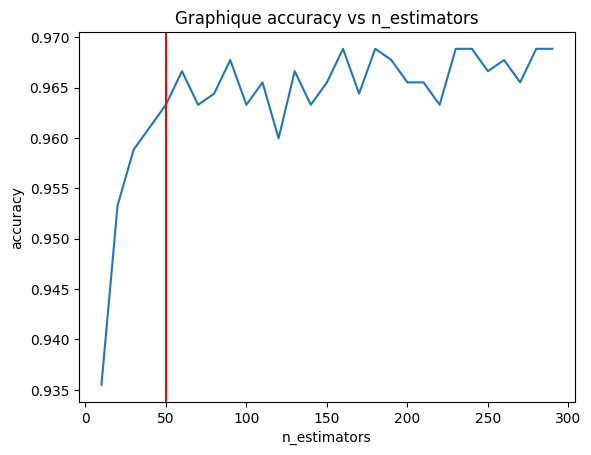

In [99]:
accuracy_values = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for n_estimators in range(10, 300, 10):
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    accuracy_values.append(clf.score(X_test,y_test))

plt.plot([n_estimators for n_estimators in range(10, 300, 10)], accuracy_values)
plt.title("Graphique accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.axvline(x=50, color="red", linestyle="-")
plt.show()

**Conclusion** : 

A partir de ``n_estimators = 50`` le resultat commence à osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

## Question :
Regardez dans la documentation les ExtraTreesClassifier et refaites la classification avec ce type de classifieur. Comparez avec RandomForestClassifier.


In [74]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print(f"Forêts aléatoires : {accuracy}")

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print(f"Extra Trees : {accuracy}" )

Forêts aléatoires : 0.9621802002224694
Extra Trees : 0.9733036707452726


# Boosting

Dans la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur RandomForestClassifier :

In [39]:
from sklearn.ensemble import AdaBoostClassifier 
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(accuracy)

0.8986402966625463


## Question :
 Le paramètre ``max_depth`` contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (max_depth élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre ``learning_rate`` et le nombre de classifieurs.

**Réponse :**
- Un faible ``max_depth`` génère des arbres peu profonds qui ont tendance à mal se généraliser et un ``max_depth`` élevé génère des arbres trop profonds (sur-apprentissage) et donc une mauvaise généralisation :

In [75]:
from sklearn.ensemble import AdaBoostClassifier 
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth = 2 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth = 3 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=4), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth = 4 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth = 5 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=10), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth = 10 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=15), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth = 15 on a une accuracy de : {accuracy} ")



Pour un max depth = 2 on a une accuracy de : 0.8084054388133498 
Pour un max depth = 3 on a une accuracy de : 0.8485784919653894 
Pour un max depth = 4 on a une accuracy de : 0.8893695920889988 
Pour un max depth = 5 on a une accuracy de : 0.8955500618046972 
Pour un max depth = 10 on a une accuracy de : 0.7299134734239803 
Pour un max depth = 15 on a une accuracy de : 0.7187886279357231 


 Par contre, un mauvais classifieur faible (par exemple ``max_depth = 2``) peut etre compensé par un parametre ``n_estimators`` plus grand : 
 - ``n_estimators = 30`` donne ``accuracy = 0.7``
 - ``n_estimators = 300`` donne ``accuracy = 0.85``.

In [82]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth 2 et 30 n_estimators on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour un max depth 2 et 300 n_estimators on a une accuracy de : {accuracy} ")

Pour un max depth 2 et 30 n_estimators on a une accuracy de : 0.7070457354758962 
Pour un max depth 2 et 300 n_estimators on a une accuracy de : 0.8417799752781211 


Une valeur plus faible du ``learning_rate`` permet d'améliorer le score, mais pas au-delà d'une certaine valeur : 
- ``learning_rate = 2`` donne ``accuracy = 0.91``
- ``learning_rate = 0.5`` donne ``accuracy = 0.92`` 
- mais ``learning_rate = 0.1`` donne ``accuracy = 0.86``

In [90]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour learning_rate=2 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.5)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour learning_rate=0.1 on a une accuracy de : {accuracy} ")

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(f"Pour learning_rate=0.01 on a une accuracy de : {accuracy} ")

Pour learning_rate=2 on a une accuracy de : 0.9103831891223733 
Pour learning_rate=0.1 on a une accuracy de : 0.9276885043263288 
Pour learning_rate=0.01 on a une accuracy de : 0.8683559950556242 


# Conclusion

Comme prévu avec les méthodes de bagging, nous remarquons un saut énorme dans le score par rapport à un arbre de décision classique, cela est dû au fait qu'elles réduisent la variance de l'estimateur en combinant les prédictions individuelles de plusieurs instances de ce dernier et en réalisant leur moyenne.

Les forêts aléatoires produisent un classificateur légèrement meilleur en utilisant le même principe que le bagging, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds afin de réduire la variance de l'estimateur obtenu.

Extra Trees, améliore ce score en mettant en œuvre un méta-estimateur qui ajuste un certain nombre d'arbres de décision aléatoires (alias Extra Trees) sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour améliorer la précision prédictive et contrôler le sur-ajustement.

Nous avons également vu qu'une optimisation des facteurs supplémentaires tels que n_estimateurs ou les variables explicatives considérées
a également un effet sur la valeur ``accuracy``.

Link to Github repository : https://github.com/itsnedhir/App.-Profond